In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
tf.reset_default_graph()

In [7]:
# 784
# 392
# 196
# 392
# 784

In [14]:
num_inputs =  784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [15]:
learning_rate = 0.01

In [16]:
actf = tf.nn.relu

In [17]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [18]:
initializer = tf.variance_scaling_initializer()

In [19]:
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [20]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [21]:
act_func = tf.nn.relu

In [22]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [23]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [24]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [25]:
train = optimizer.minimize(loss)

In [26]:
init = tf.global_variables_initializer()

In [27]:
saver = tf.train.Saver()

In [29]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch , y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict = {X:X_batch})
        
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch,training_loss))
        
    saver.save(sess,'./example_stacked_autoendcoder.ckpt')

EPOCH: 0 LOSS: 0.04158744588494301
EPOCH: 1 LOSS: 0.039773497730493546
EPOCH: 2 LOSS: 0.038929715752601624
EPOCH: 3 LOSS: 0.03867132589221001
EPOCH: 4 LOSS: 0.037215232849121094


In [34]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'./example_stacked_autoendcoder.ckpt')
    
    results = hid_layer2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoendcoder.ckpt


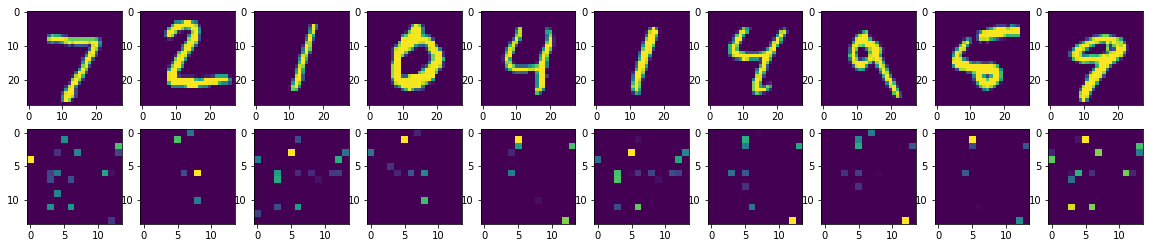

In [35]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (14, 14)))